In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
import warnings
warnings.filterwarnings('ignore')

In [2]:
reviews = pd.read_csv('balanced.csv')

In [3]:
reviews

,title,rating,body,y,cleaned_reviews,classes,cleaned_reviews_1,polarity,polarity_class
0,Unstable for large books,1.0,this calls for less than 20 lbs and a max dept...,0,call less lb max depth book book lb less see s...,bad,"['max', 'depth', 'book', 'book', 'signific', '...",-0.055556,negative
1,Get the large set,3.0,go ahead and buy the large set the small set o...,1,go ahead buy larg set small set paperback imoi...,moderate,"['ahead', 'buy', 'larg', 'set', 'small', 'set'...",-0.300000,negative
2,Measure your books before buying this,1.0,the bookholder platform on the large size book...,0,bookhold platform larg size bookshelf big stan...,bad,"['bookhold', 'platform', 'larg', 'size', 'book...",0.225000,positive
3,WILL NOT FIT NORMAL HARDCOVER BOOKS!!,2.0,be forewarned these shelves do not fit a stand...,0,forewarn shelv fit standard hardcov book even ...,bad,"['forewarn', 'shelv', 'fit', 'standard', 'hard...",0.165152,positive
4,Disappointed,2.0,i was so excited when buying this but after ha...,0,excit buy hang place son book disappoint suppo...,bad,"['excit', 'buy', 'hang', 'place', 'son', 'book...",0.200000,positive
...,...,...,...,...,...,...,...,...,...
200,Five Stars,5.0,easy to install looks great,2,easi instal look great,good,"['easi', 'instal', 'look', 'great']",0.800000,positive
201,Four Stars,4.0,unusual and a great accent prop,2,unusu great accent prop,good,"['unusu', 'great', 'accent', 'prop']",0.800000,positive
202,Were very easy to install even though instruct...,5.0,exactly as described and shown in the photos w...,2,exactli describ shown photo easi instal even t...,good,"['exactli', 'describ', 'show', 'photo', 'easi'...",0.800000,positive
203,great decorative addition,5.0,these look great,2,look great,good,"['look', 'great']",0.800000,positive


<AxesSubplot:xlabel='classes', ylabel='count'>

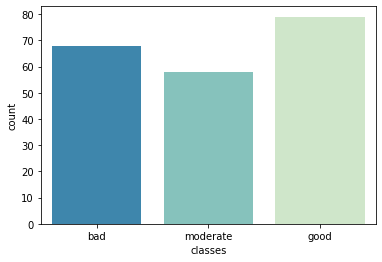

In [4]:
sns.countplot(x=reviews['classes'], palette='GnBu_r')

In [5]:
reviews['classes'].value_counts()

good        79
bad         68
moderate    58
Name: classes, dtype: int64

In [6]:
# performance mesurement

def model_performane(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [7]:
corpus = reviews['cleaned_reviews']

In [8]:
# convert text into vectors
cv = CountVectorizer(max_features = 2000)

array = cv.fit_transform(corpus.values.astype('U')).toarray()

In [9]:
array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
review_df = pd.DataFrame(array,columns= cv.get_feature_names())
review_df

,abl,absolut,accent,accommod,accomplish,accur,across,actual,ad,add,...,would,wouldnt,write,wrong,ye,year,yet,yetbut,youll,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
review_df['category'] = reviews["y"]
review_df

,abl,absolut,accent,accommod,accomplish,accur,across,actual,ad,add,...,wouldnt,write,wrong,ye,year,yet,yetbut,youll,your,category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
201,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [12]:
review_df=review_df.drop_duplicates()
review_df

,abl,absolut,accent,accommod,accomplish,accur,across,actual,ad,add,...,wouldnt,write,wrong,ye,year,yet,yetbut,youll,your,category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
201,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [13]:
X = review_df.drop(['category'],axis = 1)
y = review_df['category']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [15]:
x_train.shape

(140, 909)

### Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gaussNB_classifier = GaussianNB()
gaussNB_classifier.fit(x_train, y_train)

GaussianNB()

In [17]:
y_pred = gaussNB_classifier.predict(x_test)

In [18]:
model_performane(y_test,y_pred)

[[11  9  2]
 [ 6  8  1]
 [ 3  5 16]]
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        22
           1       0.36      0.53      0.43        15
           2       0.84      0.67      0.74        24

    accuracy                           0.57        61
   macro avg       0.59      0.57      0.57        61
weighted avg       0.62      0.57      0.59        61



<AxesSubplot:xlabel='category', ylabel='count'>

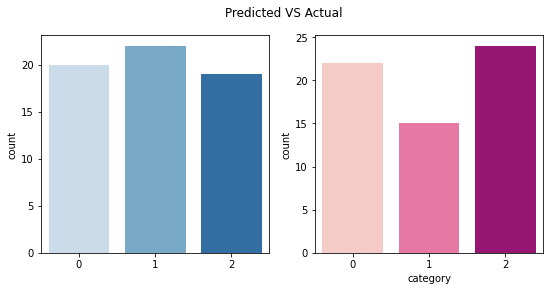

In [19]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=y_pred, ax=axs[0], palette='Blues') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values

#### Model 2

In [20]:
multiNB_classifier = MultinomialNB()
multiNB_classifier.fit(x_train, y_train)

y_predNB = multiNB_classifier.predict(x_test)
model_performane(y_test,y_predNB)

[[10 11  1]
 [ 2 10  3]
 [ 1  1 22]]
              precision    recall  f1-score   support

           0       0.77      0.45      0.57        22
           1       0.45      0.67      0.54        15
           2       0.85      0.92      0.88        24

    accuracy                           0.69        61
   macro avg       0.69      0.68      0.66        61
weighted avg       0.72      0.69      0.69        61



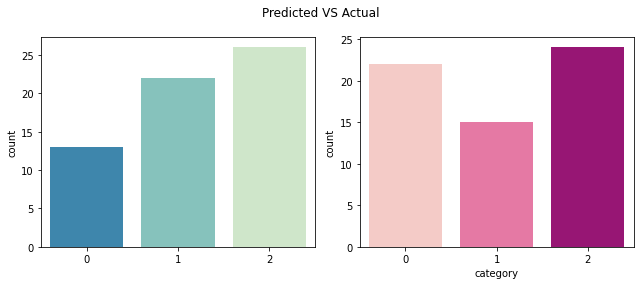

In [21]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=y_predNB, ax=axs[0], palette='GnBu_r') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values
f.tight_layout()

### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
RFclassifier = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [24]:
RFy_pred = RFclassifier.predict(x_test)

In [25]:
model_performane(y_test,RFy_pred)

[[13  7  2]
 [ 8  4  3]
 [ 1  1 22]]
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        22
           1       0.33      0.27      0.30        15
           2       0.81      0.92      0.86        24

    accuracy                           0.64        61
   macro avg       0.58      0.59      0.58        61
weighted avg       0.62      0.64      0.63        61



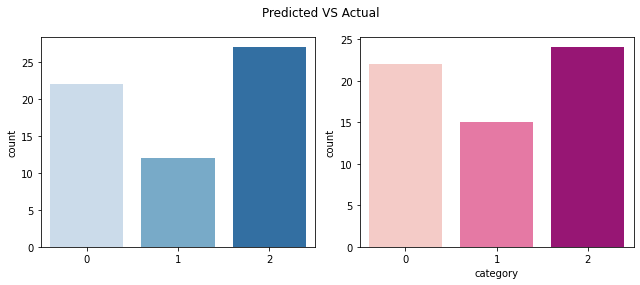

In [26]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=RFy_pred, ax=axs[0], palette='Blues') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values
f.tight_layout()

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logisticreg = LogisticRegression()
model=logisticreg.fit(x_train, y_train)
model

LogisticRegression()

In [29]:
logisticreg_pred = logisticreg.predict(x_test)

In [30]:
model_performane(y_test,logisticreg_pred)

[[10 12  0]
 [ 4 10  1]
 [ 1  0 23]]
              precision    recall  f1-score   support

           0       0.67      0.45      0.54        22
           1       0.45      0.67      0.54        15
           2       0.96      0.96      0.96        24

    accuracy                           0.70        61
   macro avg       0.69      0.69      0.68        61
weighted avg       0.73      0.70      0.70        61



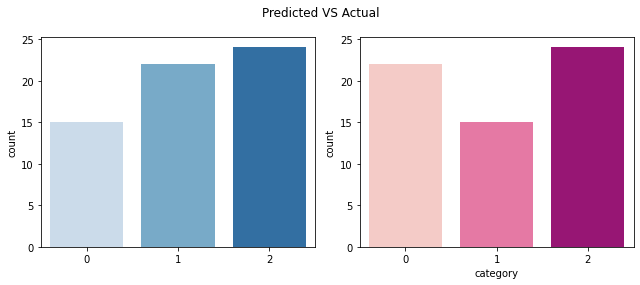

In [31]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=logisticreg_pred, ax=axs[0], palette='Blues') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values
f.tight_layout()

In [32]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


### LGBM

In [33]:
from lightgbm import LGBMClassifier

In [34]:
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

LGBMClassifier()

In [35]:
lgb_pred = lgb.predict(x_test)

In [36]:
model_performane(y_test,lgb_pred)



[[13  6  3]
 [ 6  7  2]
 [ 3  5 16]]
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        22
           1       0.39      0.47      0.42        15
           2       0.76      0.67      0.71        24

    accuracy                           0.59        61
   macro avg       0.58      0.57      0.58        61
weighted avg       0.61      0.59      0.60        61



In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
from xgboost import XGBRFClassifier

In [39]:
xgb = XGBRFClassifier()
xgb.fit(x_train, y_train)

[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=100, objective='multi:softprob',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=None, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [40]:
xgb_pred = xgb.predict(x_test)

In [41]:
model_performane(y_test,xgb_pred)

[[11 10  1]
 [11  3  1]
 [ 1  0 23]]
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        22
           1       0.23      0.20      0.21        15
           2       0.92      0.96      0.94        24

    accuracy                           0.61        61
   macro avg       0.54      0.55      0.55        61
weighted avg       0.59      0.61      0.60        61



In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
adaboost = XGBRFClassifier()
adaboost.fit(x_train, y_train)

[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=100, objective='multi:softprob',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=None, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [44]:
adaboost_pred = adaboost.predict(x_test)

In [45]:
model_performane(y_test,adaboost_pred)

[[11 10  1]
 [11  3  1]
 [ 1  0 23]]
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        22
           1       0.23      0.20      0.21        15
           2       0.92      0.96      0.94        24

    accuracy                           0.61        61
   macro avg       0.54      0.55      0.55        61
weighted avg       0.59      0.61      0.60        61



### SVM

In [46]:
from sklearn.svm import SVC

svc = SVC(C=100, kernel='rbf', gamma=0.001)
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

model_performane(y_test, svc_pred)

[[11 10  1]
 [ 5  9  1]
 [ 1  1 22]]
              precision    recall  f1-score   support

           0       0.65      0.50      0.56        22
           1       0.45      0.60      0.51        15
           2       0.92      0.92      0.92        24

    accuracy                           0.69        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.70      0.69      0.69        61



In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1,0.1,0.01,0.001,0.0001,0.00001], 'kernel': ['rbf']} 

In [49]:
grid  = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [50]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.357, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.393, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.393, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.357, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.357, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.357, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.393, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.393, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.357, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.357, total=   0.0s
[CV] 

[CV] ........... C=10, gamma=1, kernel=rbf, score=0.321, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.357, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.714, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.750, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.643, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.643, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.643, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.643, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.679, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    8.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [51]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [52]:
grid_predictions = grid.predict(x_test)

In [53]:
model_performane(y_pred, grid_predictions)

[[ 9  8  3]
 [ 7 10  5]
 [ 2  1 16]]
              precision    recall  f1-score   support

           0       0.50      0.45      0.47        20
           1       0.53      0.45      0.49        22
           2       0.67      0.84      0.74        19

    accuracy                           0.57        61
   macro avg       0.56      0.58      0.57        61
weighted avg       0.56      0.57      0.56        61



In [54]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
def predict_sentiment_1(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    temp = cv.transform([final_review]).toarray()
    return model.predict(temp)

In [56]:
a=predict_sentiment_1("large set the small set")

In [57]:
a

array([1], dtype=int64)

In [58]:
predict_sentiment_1("these look great")

array([2], dtype=int64)

In [59]:
predict_sentiment_1("defrheyjkdas")

array([0], dtype=int64)

In [60]:
def model_1(review):
    x=predict_sentiment_1(review)
    x=x.astype('int')
    x1=np.array([1])
    x2=np.array([2])
    if np.array_equal(x,x1):
        print("This is a Moderate review.")
    elif np.array_equal(x,x2):
        print("This is a Good review!")
    else:
        print("This is a Bad review ")

In [61]:
model_1(" large set the small set")

This is a Moderate review.


In [62]:
model_1("be forewarned these shelves do not fit a stand")

This is a Bad review 


In [63]:
import pickle
from pickle import dump
pickle.dump(cv,open('vectorizer.pkl','wb'))

In [64]:
from pickle import load
vec_file=pickle.load(open('vectorizer.pkl','rb'))

In [65]:
import pickle
from pickle import dump
pickle.dump(model,open('model.pkl','wb'))

In [66]:
from pickle import load
model_file=pickle.load(open('model.pkl','rb'))

In [67]:
def predict_sentiment_12(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    temp = vec_file.transform([final_review]).toarray()
    return model_file.predict(temp)

In [68]:
def model_12(review):
    x=predict_sentiment_12(review)
    x=x.astype('int')
    x1=np.array([1])
    x2=np.array([2])
    if np.array_equal(x,x1):
        print("This is a Moderate review.")
    elif np.array_equal(x,x2):
        print("This is a Good review!")
    else:
        print("This is a Bad review ")

In [69]:
model_12("good product")

This is a Bad review 
